In [227]:
# Import all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.stats import chi2

In [228]:
# Import .csv data: churn_clean.csv
churn_data = pd.read_csv("C:/Users/psuik/Desktop/WGU/D207/churn_clean.csv")

In [229]:
# Profile the data
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [230]:
# The data contains 10,000 rows and 50 columns

# The clean data file is still missing values for 'InternetService', so those values will be imputed so the data can be considered fully clean.

# Imputation will be completed using the mode of 'InternetService', a categorical variable
mode_InternetService = churn_data['InternetService'].mode()[0]

# Fill all null values in InternetService with the mode
churn_data['InternetService'] = churn_data['InternetService'].fillna(mode_InternetService)

# Confirm all missing values have been filled by returning the sum of all null values in each column
churn_data.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [231]:
# Packages are imported, and data is imported and cleaned

# The first step is to create a contingency table that holds the frequencies of values in both the 'Techie' and 'Churn' columns
# Each combination will be represented

# Create contingency table (Mehta, 2023) (WGU, 2023)
observed = pd.crosstab(churn_data['Techie'], churn_data['Churn'])
print(observed)

Churn     No   Yes
Techie            
No      6226  2095
Yes     1124   555


In [232]:
# Conduct chi-square test using the chi2_contingency function from scipy.stats (WGU, 2023)
# This function returns: chi sq statistic, p-value, deg of freedom, and expected frequencies

test_results = chi2_contingency(observed)
print(test_results)

Chi2ContingencyResult(statistic=44.11479393861451, pvalue=3.096716355509661e-11, dof=1, expected_freq=array([[6115.935, 2205.065],
       [1234.065,  444.935]]))


In [233]:
# chi sq statistic = 44.11479393861451
# p-value: 3.096716355509661e-11
# degrees of freedom: 1
# expected frequency array: ([[6115.935, 2205.065], [1234.065,  444.935]])

#Null hypothesis (H0): The churn rate for Techies and Non-Techies is equivalent.
#Alternative hypothesis (H1): The churn rate for Techies and Non-Techies is not equivalent. 

# Interpret the results based on the obtained p-value from above using a 95% confidence level, or an alpha of .05 (5%) (DataCamp, 2023):
alpha = .05
if p < alpha: 
    print("There is a significant difference between 'Techie' status and churn rate: REJECT NULL")
else: 
    print("There is not a significant difference between 'Techie' status and churn rate: DO NO REJECT NULL")

There is a significant difference between 'Techie' status and churn rate: REJECT NULL


In [226]:
# RESULT: Reject the null hypothesis

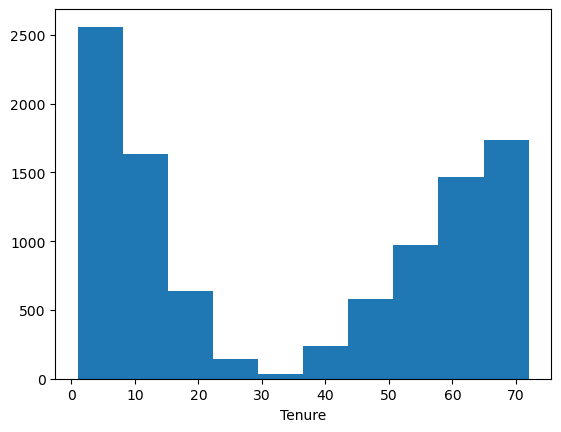

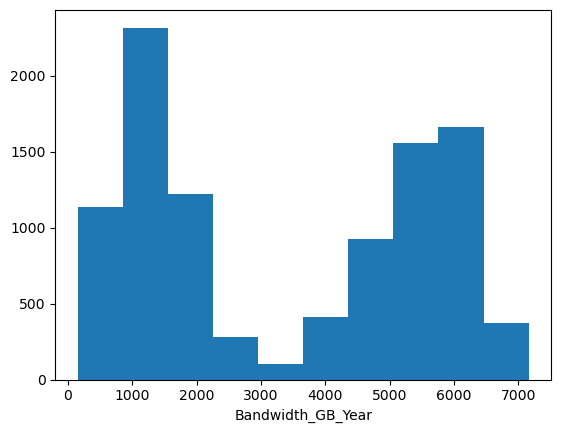

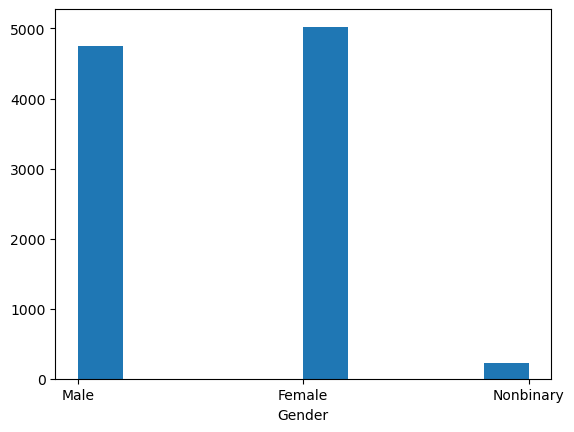

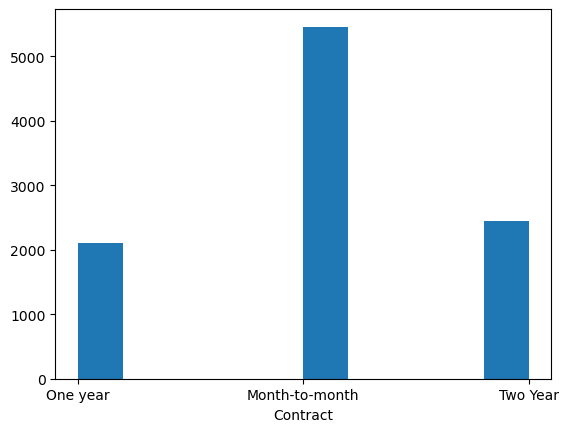

In [234]:
# Univariate statistics

# 2 Continuous: Tenure, Bandwidth_GB_Year
# 2 Categorical: Gender, Contract

# Create histograms to visualize distribution of each variable:

# Tenure (continuous)
plt.hist(churn_data['Tenure'])
plt.xlabel('Tenure')
plt.show()

# Bandwidth_GB_Year (continuous)
plt.hist(churn_data['Bandwidth_GB_Year'])
plt.xlabel('Bandwidth_GB_Year')
plt.show()

# Gender (categorical)
plt.hist(churn_data['Gender'])
plt.xlabel('Gender')
plt.show()

# Contract (categorical)
plt.hist(churn_data['Contract'])
plt.xlabel('Contract')
plt.show()

In [215]:
# Summary statistics for continuous variables 
print(churn_data['Tenure'].describe())

print(churn_data['Bandwidth_GB_Year'].describe())


# Summary statistics for categorical variables
print(churn_data['Gender'].describe())
print(churn_data['Gender'].value_counts())

print(churn_data['Contract'].describe())
print(churn_data['Contract'].value_counts())

count    10000.000000
mean        34.526188
std         26.443063
min          1.000259
25%          7.917694
50%         35.430507
75%         61.479795
max         71.999280
Name: Tenure, dtype: float64
count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64
count      10000
unique         3
top       Female
freq        5025
Name: Gender, dtype: object
Gender
Female       5025
Male         4744
Nonbinary     231
Name: count, dtype: int64
count              10000
unique                 3
top       Month-to-month
freq                5456
Name: Contract, dtype: object
Contract
Month-to-month    5456
Two Year          2442
One year          2102
Name: count, dtype: int64


<Axes: xlabel='MonthlyCharge', ylabel='Churn'>

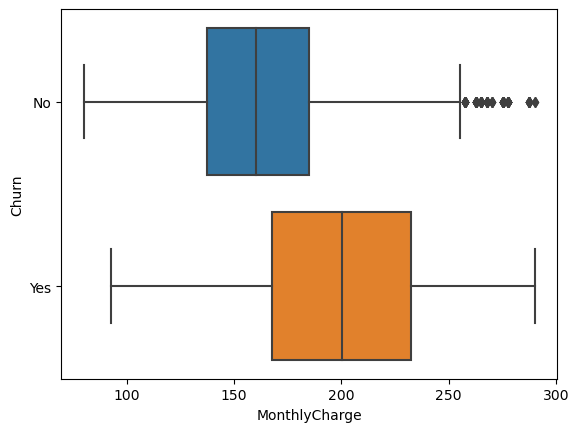

In [235]:
# Bivariate statistics

# Categorical: Churn, Continuous: MonthlyCharge
sns.boxplot(x='MonthlyCharge', y='Churn', data=churn_data)

In [236]:
median_charge_by_churn = churn_data.groupby('Churn')['MonthlyCharge'].median()
print(median_charge_by_churn)

Churn
No     159.9642
Yes    200.1185
Name: MonthlyCharge, dtype: float64


<Axes: xlabel='Income', ylabel='Area'>

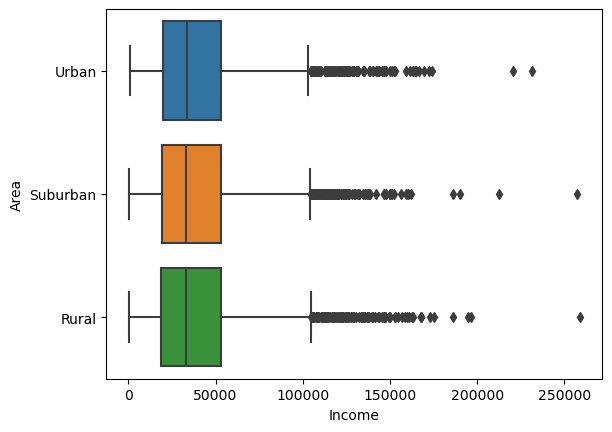

In [237]:
# Categorical: Area, Continuous: Income
sns.boxplot(x='Income',y='Area',data=churn_data)

In [238]:
median_income_by_area = churn_data.groupby('Area')['Income'].median()
print(median_income_by_area)

Area
Rural       32855.22
Suburban    33346.08
Urban       33362.41
Name: Income, dtype: float64
